In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In this notebook I began with the raw data. in its unchanged for I ran a regression on all data points competley unchanged. This gave me a completley raw or vinilla baseline model to make changes to and in theory, improve.   

In [8]:
df_house = pd.read_csv('kc_house_data.csv')

In [9]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [10]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [11]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [17]:
df_house['price'].mean()

540088.1417665294

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5a141c390>,
      dtype=object)

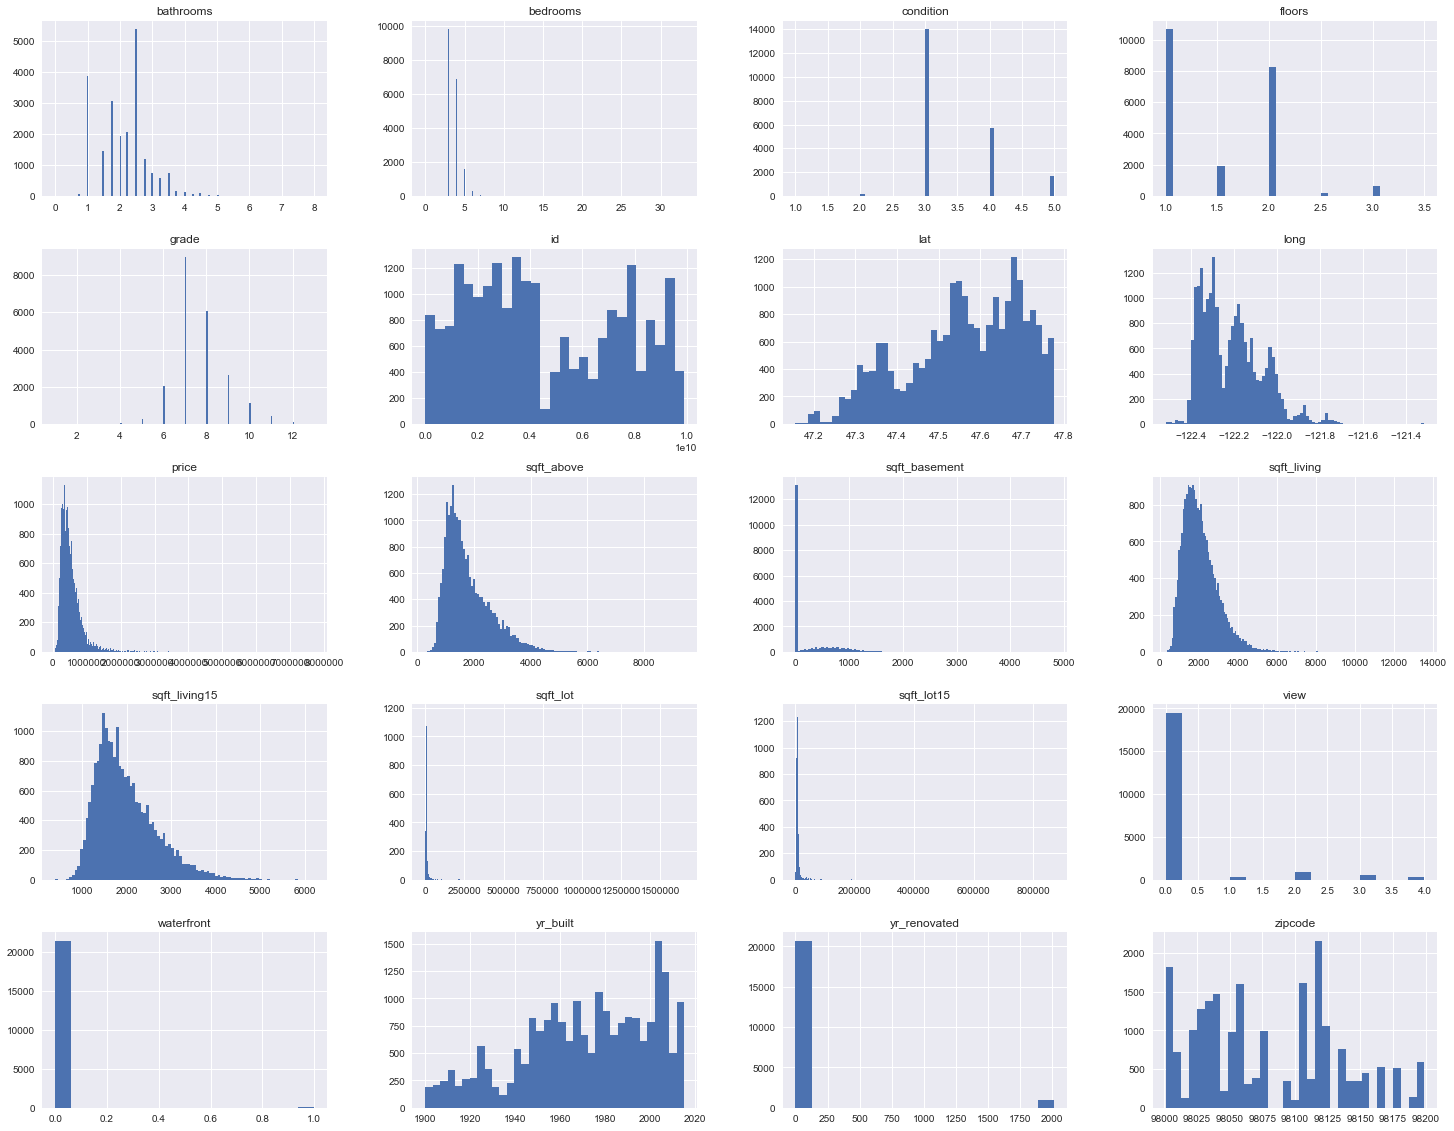

In [12]:
df_house.hist(figsize=(25,20), bins='auto')

The blow model takes into account ALL columns when discussing price. 

In [13]:
columns = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
           'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
           'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [14]:
all_data = df_house[columns]

In [52]:
X = all_data.drop(['price'], axis=1)
y = all_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

lm = sm.OLS(y_train, X_train)
model_all = lm.fit()
model_all.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2361.
Date:                Fri, 20 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:06:09   Log-Likelihood:            -2.3543e+05
No. Observations:               17290   AIC:                         4.709e+05
Df Residuals:                   17272   BIC:                         4.710e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
id            -1.307e-06   5.32e-07     -2.456      0.014   -2.35e-06   -2.64e-07
bedrooms      -3.405e+04   2079.721    -16.371      0.000   -3.81e+04      -3e+04
bathrooms       4.45e+04   3607.657     12.334      0.000    3.74e+04    5.16e+04
sqft_living     108.7783      2.530     43.002      0.000     103.820     113.737
sqft_lot          0.0865      0.058      1.495      0.135      -0.027       0.200
floors         5528.2263   3896.712      1.419      0.156   -2109.725    1.32e+04
waterfront     5.625e+05   1.95e+04     28.831      0.000    5.24e+05    6.01e+05
view           5.326e+04   2346.748     22.694      0.000    4.87e+04    5.79e+04
condition      2.521e+04   2560.508      9.848      0.000    2.02e+04    3.02e+04
grade          9.426e+04   2363.737     39.876      0.000    8.96e+04    9.89e+04
sqft_above       70.5935      2.468     28.600      0.000      65.755      75.432
sqft_basement    38.1848      2.915     13.101      0.000      32.472      43.898
yr_built      -2622.2225     75.143    -34.896      0.000   -2769.510   -2474.934
yr_renovated     20.8861      4.051      5.156      0.000      12.946      28.826
zipcode        -486.9280     19.824    -24.562      0.000    -525.785    -448.071
lat            5.949e+05   1.19e+04     50.135      0.000    5.72e+05    6.18e+05
long           -1.96e+05   1.45e+04    -13.488      0.000   -2.25e+05   -1.68e+05
sqft_living15    22.6219      3.747      6.038      0.000      15.278      29.966
sqft_lot15       -0.3330      0.082     -4.064      0.000      -0.494      -0.172
==============================================================================
Omnibus:                    15013.753   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1728730.089
Skew:                           3.646   Prob(JB):                         0.00
Kurtosis:                      51.440   Cond. No.                     3.53e+22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.07e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

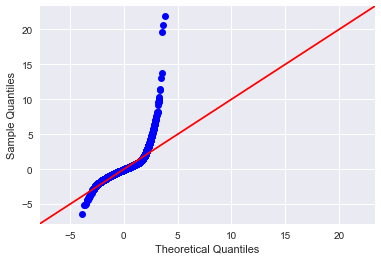

In [53]:
fig = sm.graphics.qqplot(model_all.resid, dist=stats.norm, line='45', fit=True)

In [64]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model_all.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model_all.predict(X_test))))
print('MSE difference:', np.sqrt(mean_squared_error(y_train, model_all.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_all.predict(X_test))))
print('Cross Validation Train Set:', cross_val_score(model, X_train, y_train, cv = 10, scoring = "r2").mean())
print('Cross Validation Test Set:', cross_val_score(model, X_test, y_test, cv = 10, scoring = "r2").mean())

MSE for train set: 198261.71410185285
MSE for test set: 212545.77063052307
MSE difference: -14284.056528670219
Cross Validation Train Set: 0.6990645629873329
Cross Validation Test Set: 0.6949895769616048



-This base line model had a adjusted R^2 of .699 telling me that the data can be used for liniar regression. 

-The Mean Squared error for both the test set and and training set are relativly close and at acceptable 
 numbers of 198235.87495241646 dollars for the train set and 212520.1585283142 dollars for the test set.
 The averarge house price in the data set is 540088.1417665294 dollars so this variance is acceptable.
 
-The Model accuaracy is useing the .sccore() method and is measuring the accuracy of the model against the training data, or how well the model explains the data it was trained with.
 at .7012448735876556 numbers states that the mo

-The Cross Validation confirms the model accury score over the entire data set. 
